In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras
import pickle

In [2]:
f = datasets.fashion_mnist
(trainimages, trainlabels), (testimages, testlabels) = keras.datasets.fashion_mnist.load_data()

Data Preprocessing

In [3]:
type(trainimages), type(trainlabels), len(trainimages), len(trainlabels)

(numpy.ndarray, numpy.ndarray, 60000, 60000)

In [4]:
trainimages[0], trainimages[0].shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

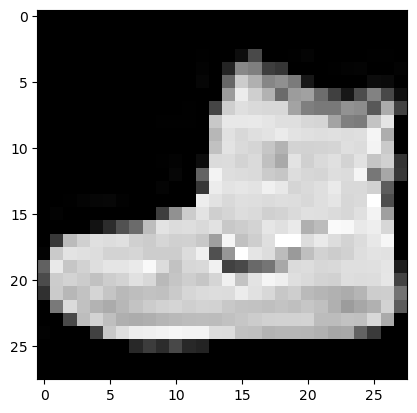

In [5]:
plt.imshow(trainimages[0], cmap = 'gray')
plt.show()

In [6]:
trainlabels[0]

9

In [7]:
#normalizing the data
trainimages, testimages = trainimages / 255, testimages / 255

In [8]:
trainimages = trainimages.reshape(trainimages.shape[0], 28, 28, 1)
testimages = testimages.reshape(testimages.shape[0], 28, 28, 1)

In [9]:
trainimages.shape, testimages.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
trainlabels.shape, testlabels.shape

((60000,), (10000,))

Convolutional Neural Network Model

In [11]:
from keras import Sequential
from keras.layers import Dense

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

C:\Users\sidal\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [14]:
m = model.fit(trainimages, trainlabels, epochs = 5, validation_data = (testimages, testlabels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 24ms/step - accuracy: 0.7429 - loss: 0.6877 - val_accuracy: 0.8592 - val_loss: 0.3976
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8800 - loss: 0.3308 - val_accuracy: 0.8881 - val_loss: 0.3053
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8978 - loss: 0.2738 - val_accuracy: 0.8982 - val_loss: 0.2842
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9102 - loss: 0.2362 - val_accuracy: 0.8990 - val_loss: 0.2709
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9190 - loss: 0.2124 - val_accuracy: 0.9002 - val_loss: 0.2764


In [15]:
testimages.shape, testlabels.shape

((10000, 28, 28, 1), (10000,))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [17]:
l, acc = model.evaluate(testimages, testlabels, verbose = 2)
acc

313/313 - 3s - 8ms/step - accuracy: 0.9002 - loss: 0.2764


0.9002000093460083

Plotting a graph that compares the accuracy and the loss

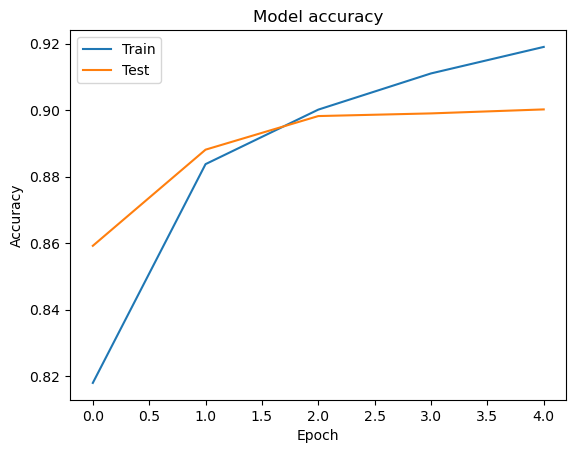

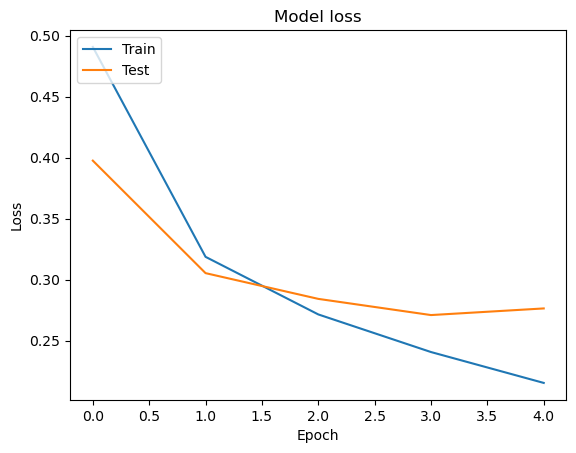

In [18]:
# Plot training & validation accuracy values
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [20]:
pickle.dump(model, open('fashionmnistclassifier.pkl', 'wb'))